# Welcome to the GenQ Hackathon in Calgary, Alberta!
We are excited to have you here. This is your workspace for the hackathon, where you can develop your projects and explore new ideas.

**Good luck and may the best ideas win!**

## Access the Hackathon Documentation
For all relevant information, rules, resources, and updates throughout the event, please refer to the official [Hackathon Documentation](https://gen-q.tech/).
This will be your go-to guide during the hackathon to stay informed and make the most out of your experience.

**Also, take a deep look on [QCentroid documentation](https://docs.qcentroid.xyz/platform/genq-qc-hackathon/)**

## Access the Challenge Documentation
Your challenge is [Quantum Wind Farms](./QAI-Hackathon_UseCaseWindFarms.pdf). Please, read carefully before coding.\
You will code using [Pasqal](https://pulser.readthedocs.io/en/stable/index.html). Please, take a look at the examples and visit the documentation

## How to run your algorithm
1. Select your input json dataset. `input_json='input.json'`
2. Read the json and read the data section. `with open(input_json) as f: input_data = json.load(f) data=input_data['data'] `
3. Call main.run with `result=main.run(data,None,None)`
4. Verify that your result is json compatible `json.loads(result)`

## How to use your backend
1. Your backend is Pasqal.
2. You only need to get your assigned token and account using `os.environ.get('PASQAL_USERNAME')`,`os.environ.get('PASQAL_PROJECTID')` and `os.environ.get('PASQAL_PASSWORD'))` . You don't need to request a token.
3. You can use local or remote simulator. For local simulation:

```python
    #This is the code to get your backend
    simul = QutipEmulator.from_sequence(seq)
   ```
4. For remote simulation:
```python
    #This is the code to get your backend
    connection = PasqalCloud(
        username=os.environ.get('PASQAL_USERNAME'),  # Your username or email address for the Pasqal Cloud Platform
        project_id=os.environ.get('PASQAL_PROJECTID'),  # The ID of the project associated to your account
        password=os.environ.get('PASQAL_PASSWORD'),  # The password for your Pasqal Cloud Platform account
    )
    tn_bknd = pulser.backends.EmuTNBackend(
        seq, connection=connection, config=emu_tn_default
    )
   ```
   

## How to test in the evaluation platform
1. When you have something interesting to be evaluated, please, commit and pull using the Git menu on the left (add everything, press Commit at the bottom and find a button at the top with a yellow dot)
2. Go to the evaluation platform.
3. Find your repository, pull your repository.
4. Execute a new job

## Libraries to be used (installed in your IDE and evaluation platform)
1. All the standard distribution.
2. Matplotlib, Numpy, Pandas, Tensorflow, Scipy, Seaborn, Statsmodels, Networkx, Scikit and Dask
3. For your specific challenge QuantumRingsLib
4. For any other library, please, ask support team.

## Important things to take care of
1. Inside main.py there is a method with a specific signature. Don't modify that. It is your solver entry point `def run(input_data,solver_params,extra_arguments)`
2. QCentroid datasets have 3 sections, but 2 of them are not used in this Hackathon. Your data will be inside data section in your json `{"data":{(your data)}}`
3. If you want to upload a dataset to QCentroid platform, please ask support team how to do that.
4. Any issue ask the support team during the day or write an email from your hackathon email account to teamx@qai-ventures.com
   

In [1]:
input_json='Datasets/customDataset.json'

In [2]:
#############################################################################################################################
############################################## PLEASE, DON'T MODIFY THIS CELL. ##############################################
######################## IF THIS CELL DOES NOT WORK, YOUR CODE WON'T WORK ON THE EVALUATION PLATFORM ########################
#############################################################################################################################

%load_ext autoreload
%autoreload 2

import json
import main
with open(input_json) as f:
  input_data = json.load(f)
data=input_data['data']
result=main.run(data,None,None)
json.dumps(result)

KeyError: 'bird_radius'

In [10]:
%load_ext autoreload
%autoreload 2

import json
import main
from pulser.devices import DigitalAnalogDevice
from matplotlib import pyplot as plt
import numpy as np

B = 6.56

input_json='Datasets/tiny-testcases0.json'

with open(input_json) as f:
  input_data = json.load(f)
data=input_data['data']
reg, result=main.run(data,None,None)
json.dumps(result)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Bird radius: 0.5
9.756753962298905
starting sim
10.0%. Run time:   0.07s. Est. time left: 00:00:00:00
20.0%. Run time:   0.13s. Est. time left: 00:00:00:00
30.0%. Run time:   0.20s. Est. time left: 00:00:00:00
40.0%. Run time:   0.28s. Est. time left: 00:00:00:00
50.0%. Run time:   0.35s. Est. time left: 00:00:00:00
60.0%. Run time:   0.42s. Est. time left: 00:00:00:00
70.0%. Run time:   0.50s. Est. time left: 00:00:00:00
80.0%. Run time:   0.57s. Est. time left: 00:00:00:00
90.0%. Run time:   0.64s. Est. time left: 00:00:00:00
Total run time:   0.72s
finished sim


'{"00000001": 1, "00000010": 1, "00000101": 17, "00001001": 39, "00001010": 108, "00001011": 206, "00001101": 96, "00001110": 1, "00001111": 3, "00010010": 3, "00100000": 1, "00101000": 3, "01000001": 10, "01000010": 8, "01000011": 21, "10000010": 51, "10000100": 25, "10000110": 17, "10001000": 1, "10001010": 162, "10001100": 4, "10001110": 2, "10100000": 4, "10101000": 1, "11000010": 215}'

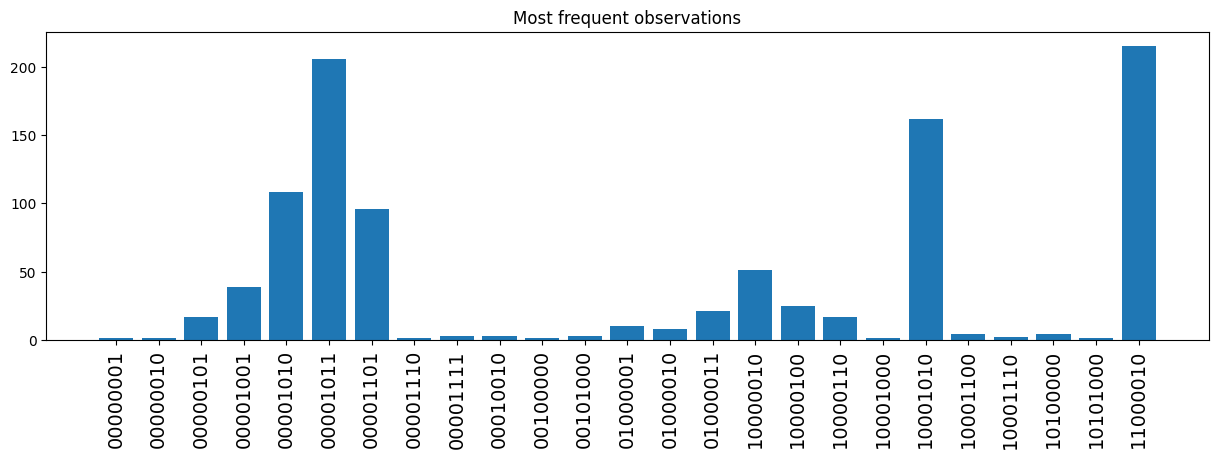

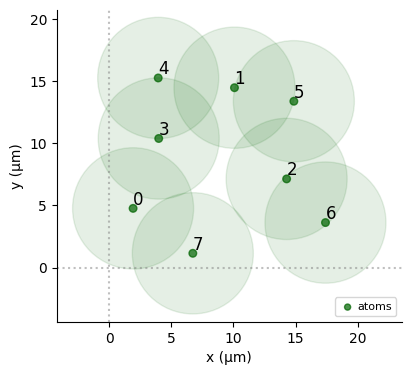

In [11]:
large_counts = {k: v for k, v in result.items()}

plt.figure(figsize=(15, 4))
plt.xticks(rotation=90, fontsize=14)
plt.title("Most frequent observations")
plt.bar(large_counts.keys(), large_counts.values())

reg.draw(
    blockade_radius=DigitalAnalogDevice.rydberg_blockade_radius(2 * 3.14),
    draw_graph=False,
    draw_half_radius=True,
)

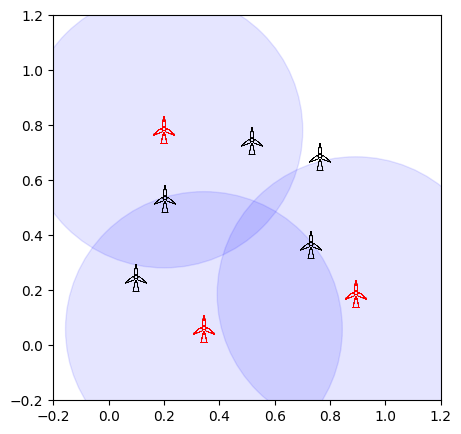

In [12]:
solutions = {k: v for k, v in result.items() if v >= max(result.values()) / 1.1}
sol_string = max(solutions, key=lambda x: x.count('1'))
solution = [i for i in range(len(sol_string)) if sol_string[i] == '1']
solution_points = [data["points"][i] for i in solution]

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Circle
import numpy as np
from PIL import Image

fig, ax = plt.subplots(figsize=(5,5))

def plot_with_icon(ax, img_path, coords):
    img = Image.open(img_path)  # Load the image
    for (x, y) in coords:
        imagebox = OffsetImage(plt.imread(img_path), zoom=0.1)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False)
        ax.add_artist(ab)

img_path = "turb.png"  # Replace with your image path
plot_with_icon(ax, img_path, data["points"])
plot_with_icon(ax, "red.png", solution_points)

# Plot circles with outline and faint fill
for (x, y) in solution_points:
    circle = Circle((x, y), radius=data["bird_radius"], edgecolor='blue', facecolor='blue', alpha=0.1)
    ax.add_patch(circle)

# Set limits for the plot for better visualization
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)

# Show the plot
plt.savefig("Figs/wind5.png")
